In [3]:
import pandas as pd

In [84]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  


In [85]:
Xdf = X.copy()
ydf = y.copy()

In [86]:
y = ydf.copy()
X = Xdf.copy()

In [80]:
X.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8


In [81]:
y.head()

,quality
0,-1
1,-1
2,-1
3,0
4,-1


In [39]:
print(X.shape)
print(y.shape)

(6497, 11)
(6497, 1)


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [41]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quality  6497 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB


<Axes: >

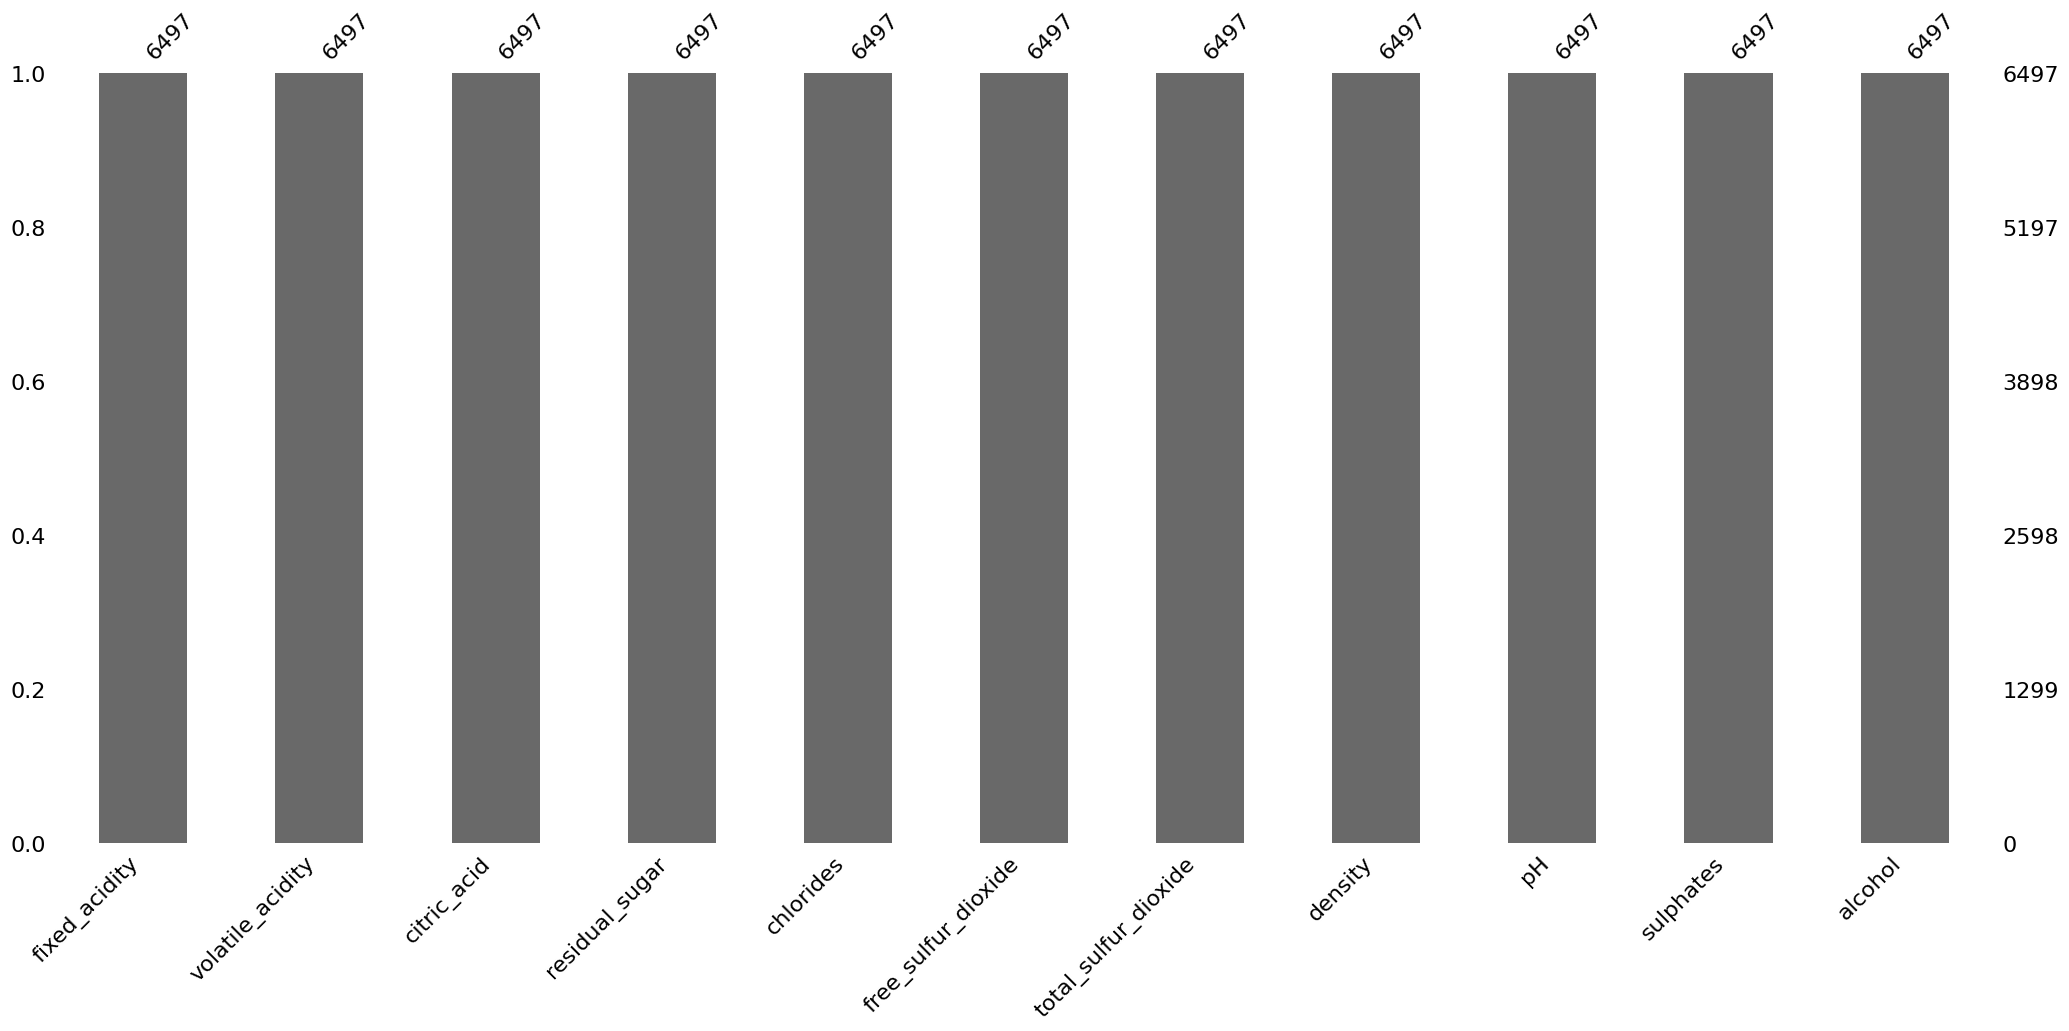

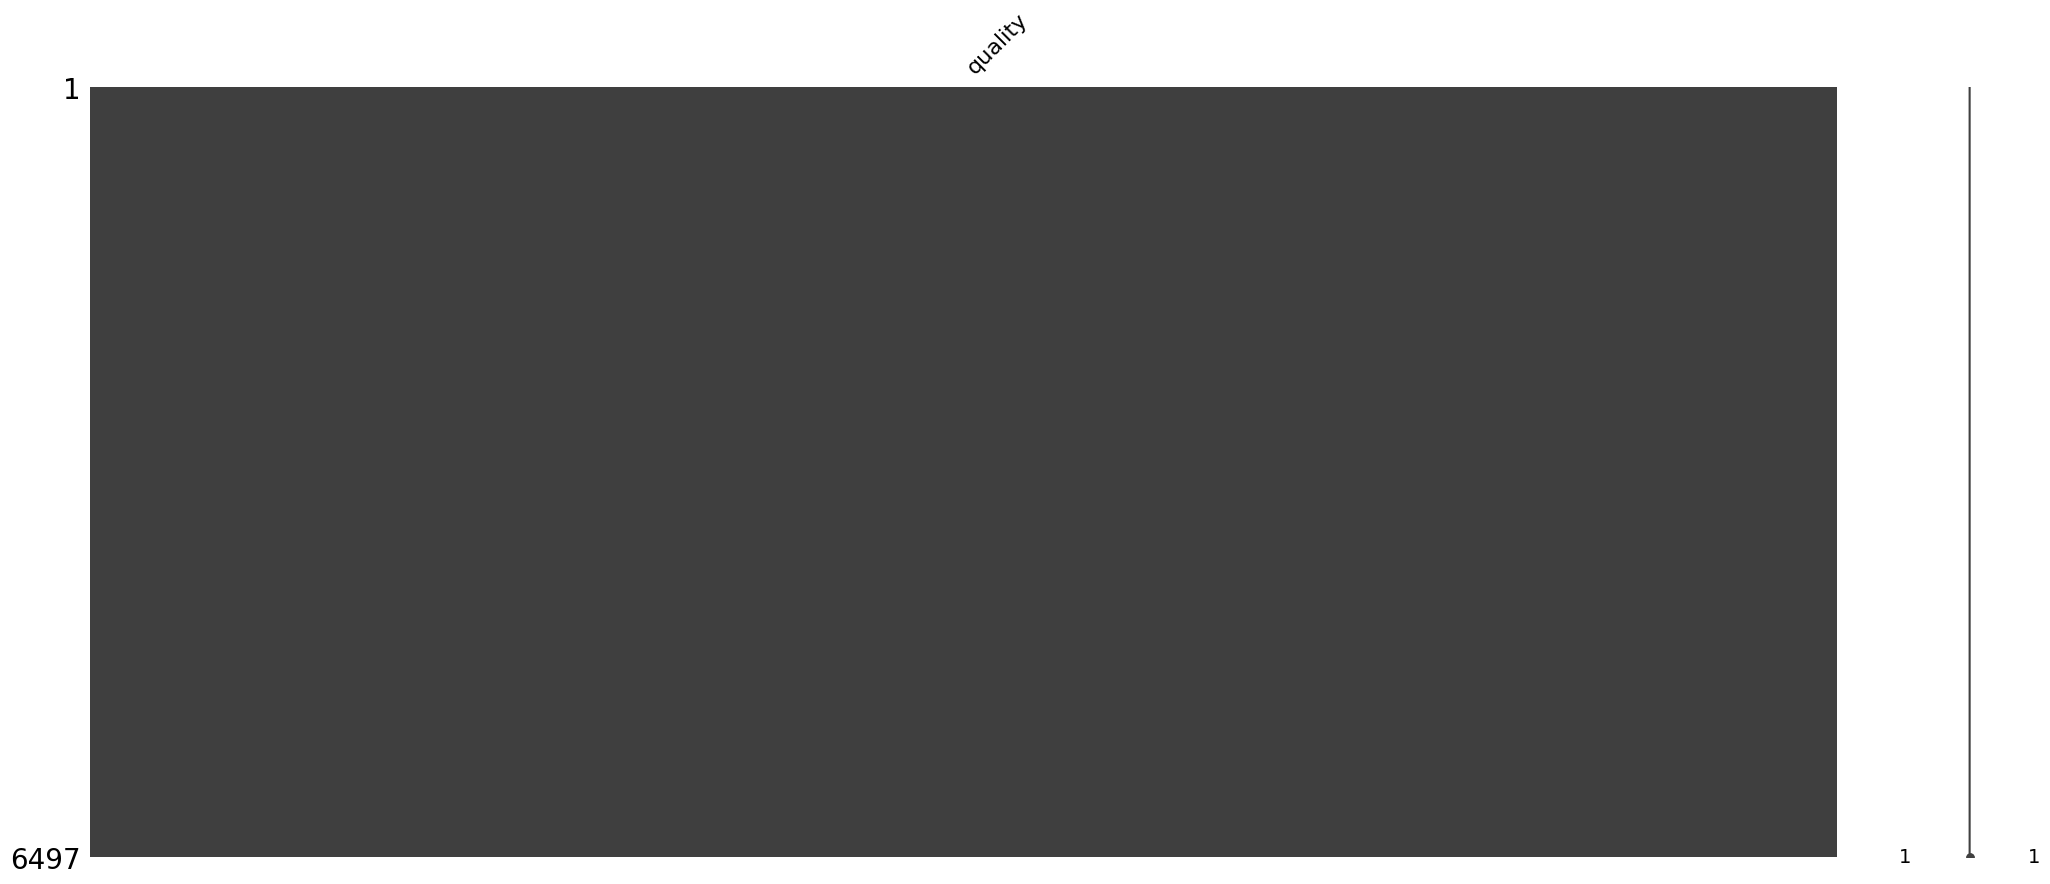

In [42]:
import missingno
missingno.bar(X)
missingno.matrix(y)

In [43]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
X.insert(0,"ID",range(len(X)))

In [45]:
X.head()

,ID,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


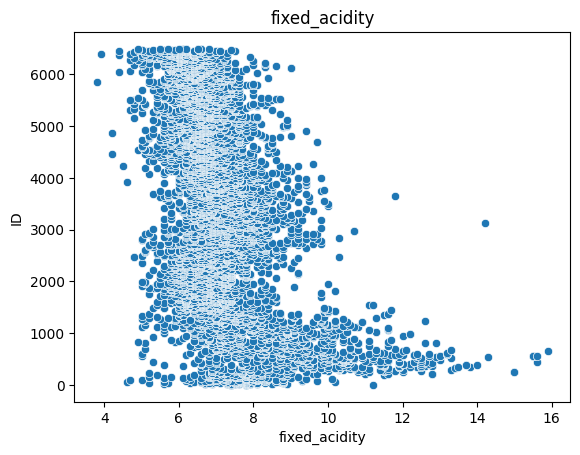

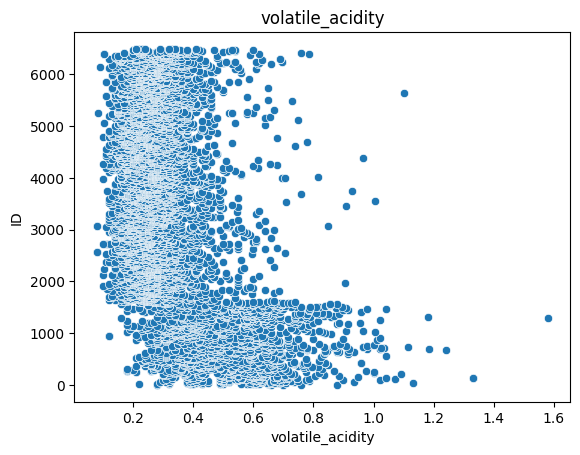

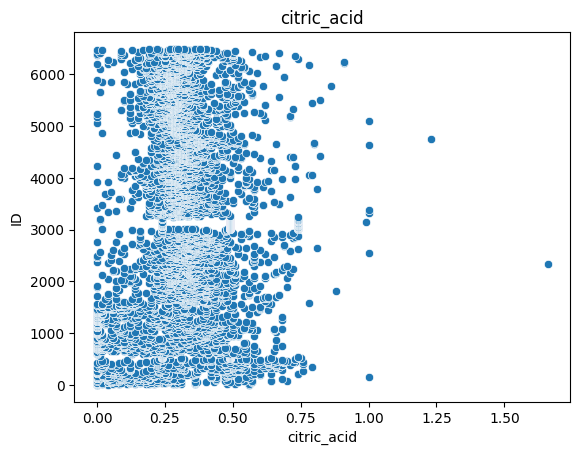

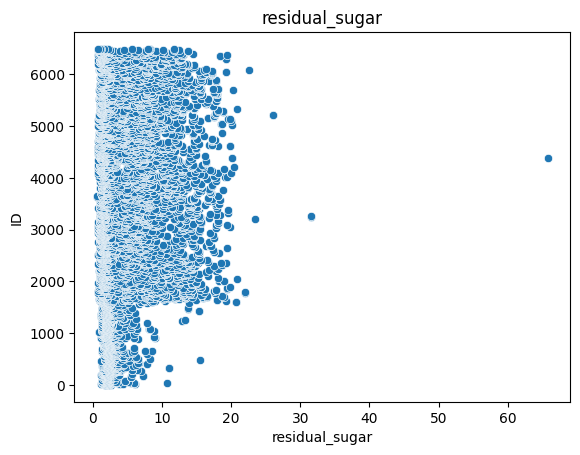

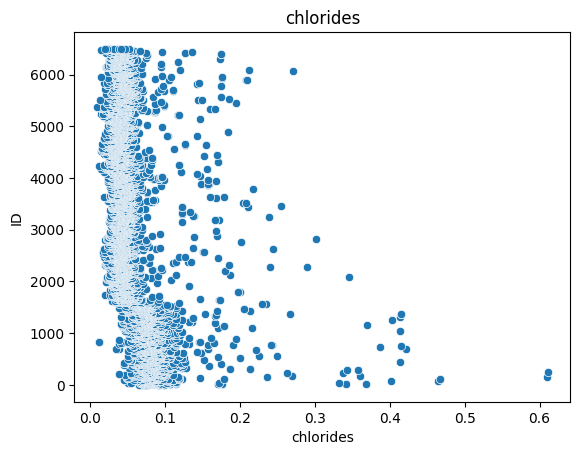

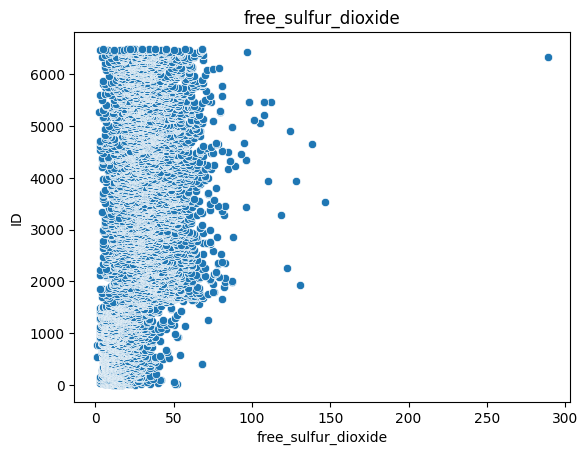

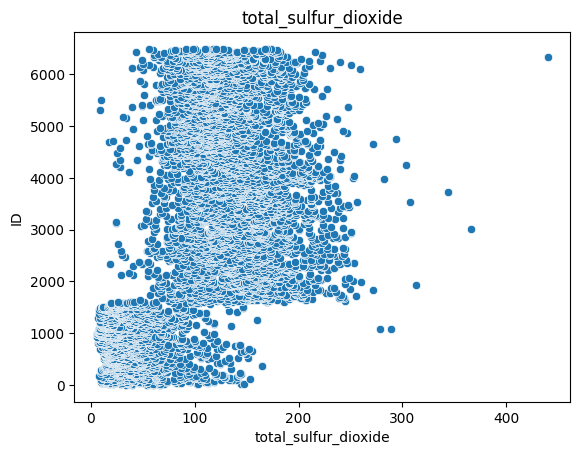

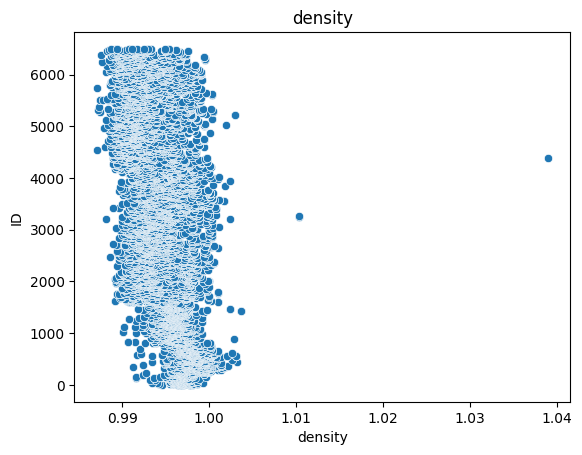

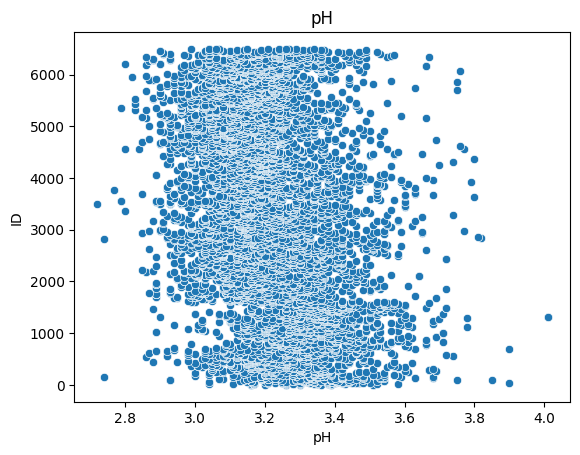

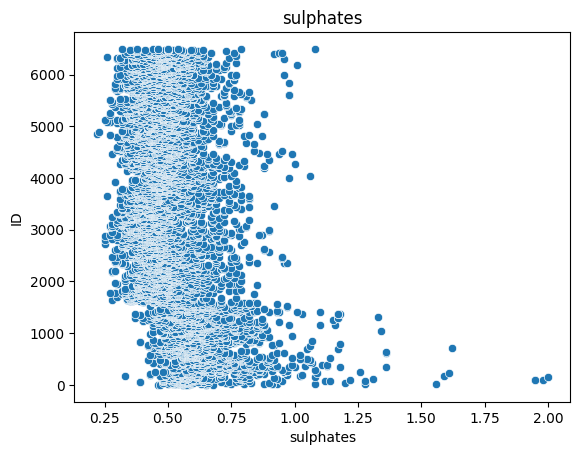

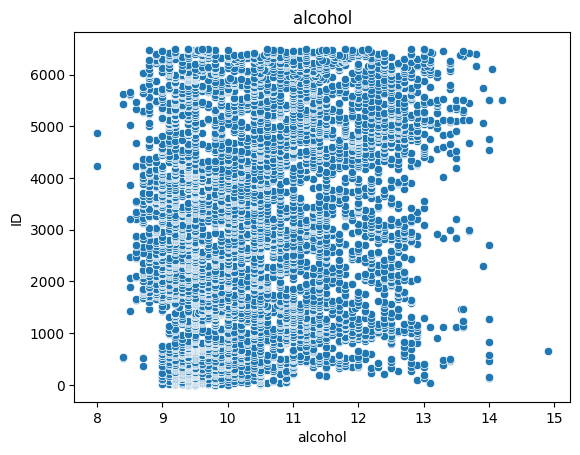

In [46]:
features = X.columns.tolist()

for feature in features:
    if feature == 'ID':
        continue
    sns.scatterplot(data=X, x=feature, y='ID')
    plt.title(feature)
    plt.show()

In [47]:
X = X.drop(columns="ID",axis=1)
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [88]:
y.value_counts()

quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
Name: count, dtype: int64

In [89]:
y = y - 3  # 3-9 aralığını 0-6 aralığına çekiyoruz.
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [90]:
print(y_train.value_counts())
print(y_test.value_counts())

quality
3          2269
2          1710
4           863
1           173
5           154
0            24
6             4
Name: count, dtype: int64
quality
3          567
2          428
4          216
1           43
5           39
0            6
6            1
Name: count, dtype: int64


In [91]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [95]:
from imblearn.over_sampling import SMOTE

In [100]:
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000, C=0.9),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', decision_function_shape='ovr'),
    'XGBClassifier': XGBClassifier()
}

trained_models = {}

# Modelleri eğit ve değerlendir
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Resampled veri ile eğit

    y_pred = model.predict(x_test)

    print(f"{model_name} - Test Seti Performansı")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average="macro", zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average="macro", zero_division=0))
    print("F1-Score:", f1_score(y_test, y_pred, average="macro", zero_division=0))
    print(30 * "-")

    trained_models[model_name] = model  # Eğitilmiş modeli sakla



Logistic Regression - Test Seti Performansı
Accuracy: 0.5346153846153846
Precision: 0.3731125493707645
Recall: 0.22197211090800478
F1-Score: 0.22365307834952652
------------------------------
RandomForest - Test Seti Performansı
Accuracy: 0.6923076923076923
Precision: 0.52840745366755
Recall: 0.3735308788480459
F1-Score: 0.4078817406474521
------------------------------
Support Vector Machine - Test Seti Performansı
Accuracy: 0.5715384615384616
Precision: 0.24644360708455562
Recall: 0.23148501352773715
F1-Score: 0.22919852637004215
------------------------------
XGBClassifier - Test Seti Performansı
Accuracy: 0.6661538461538462
Precision: 0.45277818645054285
Recall: 0.35939783383920787
F1-Score: 0.38474643373163125
------------------------------
